In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data20 = pd.read_csv('Jan_2020_ontime.csv')
data20.drop(['Unnamed: 21'], axis=1, inplace=True)
data20.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0


In [3]:
data19 = pd.read_csv('Jan_2019_ontime.csv')
data19.drop(['Unnamed: 21'], axis=1, inplace=True)
#data19.head()

In [4]:
#We concatenate the two January dataset from 2019 and 2020 
data = pd.concat([data19, data20])

In [5]:
#A closer look at the dataset
data.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
count,1.191331e+06,1.191331e+06,1.191331e+06,1.191331e+06,1.191331e+06,1.191331e+06,1.191331e+06,1.191331e+06,1.168315e+06,1.168277e+06,1.167195e+06,1.165231e+06,1.191331e+06,1.191331e+06,1.191331e+06
mean,1.598775e+01,3.896858e+00,1.998878e+04,2.580946e+03,1.265852e+04,1.265856e+06,1.265831e+04,1.265835e+06,1.331729e+03,1.547672e-01,1.481052e+03,1.609183e-01,1.985510e-02,2.053166e-03,7.978853e+02
std,8.989395e+00,1.916886e+00,3.767608e+02,1.822637e+03,1.521957e+03,1.521955e+05,1.521858e+03,1.521856e+05,4.962741e+02,3.616828e-01,5.243978e+02,3.674557e-01,1.395023e-01,4.526535e-02,5.886157e+02
min,1.000000e+00,1.000000e+00,1.939300e+04,1.000000e+00,1.013500e+04,1.013505e+06,1.013500e+04,1.013505e+06,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01
25%,8.000000e+00,2.000000e+00,1.979000e+04,1.027000e+03,1.129200e+04,1.129202e+06,1.129200e+04,1.129202e+06,9.200000e+02,0.000000e+00,1.101000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.660000e+02
50%,1.600000e+01,4.000000e+00,1.997700e+04,2.142000e+03,1.288900e+04,1.288903e+06,1.288900e+04,1.288903e+06,1.327000e+03,0.000000e+00,1.515000e+03,0.000000e+00,0.000000e+00,0.000000e+00,6.400000e+02
75%,2.400000e+01,5.000000e+00,2.036800e+04,4.009000e+03,1.402700e+04,1.402702e+06,1.402700e+04,1.402702e+06,1.739000e+03,0.000000e+00,1.919000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.037000e+03
max,3.100000e+01,7.000000e+00,2.045200e+04,7.439000e+03,1.686900e+04,1.686901e+06,1.686900e+04,1.686901e+06,2.400000e+03,1.000000e+00,2.400000e+03,1.000000e+00,1.000000e+00,1.000000e+00,5.095000e+03


In [6]:
#Test for NAN values
for column in data.columns.values:
    print(f'{column}: {data[column].isnull().sum()}')

DAY_OF_MONTH: 0
DAY_OF_WEEK: 0
OP_UNIQUE_CARRIER: 0
OP_CARRIER_AIRLINE_ID: 0
OP_CARRIER: 0
TAIL_NUM: 3241
OP_CARRIER_FL_NUM: 0
ORIGIN_AIRPORT_ID: 0
ORIGIN_AIRPORT_SEQ_ID: 0
ORIGIN: 0
DEST_AIRPORT_ID: 0
DEST_AIRPORT_SEQ_ID: 0
DEST: 0
DEP_TIME: 23016
DEP_DEL15: 23054
DEP_TIME_BLK: 0
ARR_TIME: 24136
ARR_DEL15: 26100
CANCELLED: 0
DIVERTED: 0
DISTANCE: 0


In [7]:
data.shape

(1191331, 21)

In [8]:
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


In [9]:
corr_matrix = data.corr(method ='pearson') #Test for correlation of features
corr_matrix

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
DAY_OF_MONTH,1.000000,-0.042553,-0.001265,-0.015823,-0.004971,-0.004971,-0.004963,-0.004963,-0.003349,-0.013177,0.006048,-0.005327,0.063046,0.000522,-0.020558
DAY_OF_WEEK,-0.042553,1.000000,0.007998,0.059044,0.005538,0.005538,0.005226,0.005226,0.005011,0.022601,0.001044,0.024707,0.008820,0.001541,0.019302
OP_CARRIER_AIRLINE_ID,-0.001265,0.007998,1.000000,0.437421,-0.047495,-0.047495,-0.047675,-0.047675,0.003234,0.035887,-0.015241,0.070229,0.017882,0.011691,-0.127043
OP_CARRIER_FL_NUM,-0.015823,0.059044,0.437421,1.000000,-0.054657,-0.054657,-0.059944,-0.059945,0.006485,0.024047,0.007673,0.033355,0.034782,0.007428,-0.347685
ORIGIN_AIRPORT_ID,-0.004971,0.005538,-0.047495,-0.054657,1.000000,1.000000,0.017462,0.017463,-0.032592,0.002847,-0.004194,0.007959,0.011872,-0.001090,0.089662
ORIGIN_AIRPORT_SEQ_ID,-0.004971,0.005538,-0.047495,-0.054657,1.000000,1.000000,0.017463,0.017463,-0.032592,0.002847,-0.004194,0.007959,0.011872,-0.001090,0.089662
DEST_AIRPORT_ID,-0.004963,0.005226,-0.047675,-0.059944,0.017462,0.017463,1.000000,1.000000,0.031905,0.009664,0.023973,0.010728,0.011055,0.003175,0.089691
DEST_AIRPORT_SEQ_ID,-0.004963,0.005226,-0.047675,-0.059945,0.017463,0.017463,1.000000,1.000000,0.031904,0.009664,0.023973,0.010728,0.011055,0.003175,0.089691
DEP_TIME,-0.003349,0.005011,0.003234,0.006485,-0.032592,-0.032592,0.031905,0.031904,1.000000,0.172707,0.668867,0.129090,0.003113,-0.001416,-0.021322
DEP_DEL15,-0.013177,0.022601,0.035887,0.024047,0.002847,0.002847,0.009664,0.009664,0.172707,1.000000,0.080924,0.716551,0.019339,0.020837,0.012579


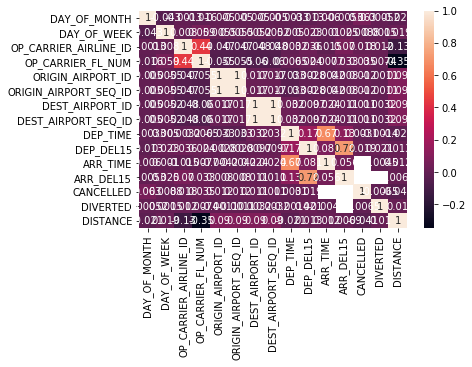

In [10]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [11]:
data.drop(['ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_SEQ_ID'], axis=1, inplace=True)

In [ ]:
data = data.dropna()

In [13]:
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,GNV,10397,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,20363,9E,N348PQ,3281,13487,MSP,11193,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,20363,9E,N8896A,3282,11433,DTW,11193,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,20363,9E,N8886A,3283,15249,TLH,10397,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,20363,9E,N8974C,3284,10397,ATL,11778,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


In [ ]:
#We need to encode some of the features as categorical features in either ordinal or one-hot encoding.
#Get unique values for ordinal encoding
timeslots = sorted(data.DEP_TIME_BLK.unique().tolist()) #It is important to sort the values, otherwise it isn't ordinal and you will make it a lot harder for the model.

enc = OrdinalEncoder(categories=[timeslots])
ts = np.array(data.DEP_TIME_BLK).reshape(-1,1)
data['timeslots'] = np.array(enc.fit_transform(ts))
data.drop(['DEP_TIME_BLK'], axis=1, inplace=True)

In [ ]:
data.head()

In [ ]:
y = []
data2 = data.loc[:,'ARR_DEL15':'DIVERTED']
for index, row in data2.iterrows():
    if 1 in row.values:
        y.append(1)
    else:
        y.append(0)

In [ ]:
data.drop(['ARR_DEL15', 'CANCELLED', 'DIVERTED'], axis=1, inplace=True)

In [ ]:
#Encoding categorical One-hot data
one_hot = OneHotEncoder()
cat_data = one_hot.fit_transform(data.iloc[:,2:11]).asarray(dtype='int')

In [ ]:
cat_data = pd.DataFrame(cat_data)
cat_data.info()

In [ ]:
data2 = data.iloc[:,-2:]

In [ ]:
data = pd.concat([data.iloc[:,:2], cat_data], axis=1)

In [ ]:
data = pd.concat([data, data2], axis=1)
data = pd.concat([data, y], axis=1)

In [ ]:
cat_data = np.hstack((time_data, cat_data, np_timeslots, np.array(y).reshape(-1,1)))

In [ ]:
np_data.shape

In [ ]:
#Export .csv for decisiontrees
#export = data.to_csv('flightdata_Jan_cleaned_decisiontrees.csv', index=None)

For use with deep neural networks

In [ ]:
#Export .csv for DNN
#export = data_clean.to_csv('flightdata_Jan_cleaned.csv', index=None)

In [ ]:
#resample = SMOTEENN()
#model = DecisionTreeClassifier()
#pipeline = Pipeline(steps=[('r', resample), ('m', model)])
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=2)
## summarize performance
#print('Mean ROC AUC: %.3f' % mean(scores))